In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import string
import spacy
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\ass.11 text minig\archive\Womens Clothing E-Commerce Reviews.csv', header=0,index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.duplicated().sum()

21

In [4]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
(df.isna().sum()/df.shape[0])*100

Clothing ID                 0.000000
Age                         0.000000
Title                      16.147454
Review Text                 3.515875
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059663
Department Name             0.059663
Class Name                  0.059663
dtype: float64

In [7]:
df['Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [8]:
review = df[['Review Text', 'Recommended IND']]
review.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [9]:
review = review.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
review.head()


,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [10]:
review.isnull().sum()

Review         825
Recommended      0
dtype: int64

In [11]:
review.dropna(subset=['Review'], inplace=True)
review.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [12]:
review['Review'] = review['Review'].astype(str)

In [13]:
review['Recommended'].value_counts()

1    18539
0     4101
Name: Recommended, dtype: int64

# Visualization

Text(0.5, 1.0, 'Proportion Target Class')

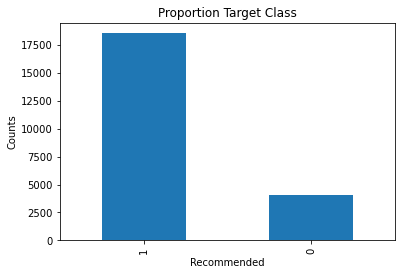

In [14]:
review["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

C:\Users\91832\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

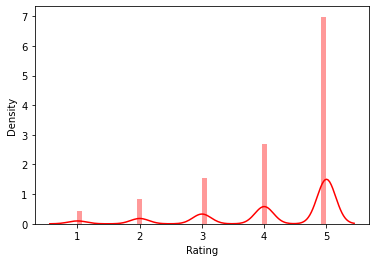

In [15]:
sns.distplot(df.Rating, color = 'red')

In [16]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [17]:
review['Review_clear'] = review['Review'].apply(tokens)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress it s sooo pretty i happened to...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit it s fun flirty...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...


In [18]:
review['Review_clear'] = review['Review_clear'].astype(str)


In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91832\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [21]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [22]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)


In [23]:
review['Review_clear'] = review['Review_clear'].apply(stopwords)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [24]:
review['Review_clear'][267]

'love look quality amp say fits true size way short amp amp tall wish came tall sizes'

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91832\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from nltk.stem import WordNetLemmatizer


In [27]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [28]:
review['Review_clear'] = review['Review_clear'].apply(lemma)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [29]:
positive = review[review.Recommended== 1]
negative = review[review.Recommended== 0]
positive.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...
6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [30]:
negative.head()

,Review,Recommended,Review_clear
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...
5,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one petite foot tall us...
10,Dress runs small esp where the zipper area run...,0,run small esp zipper area run ordered sp typic...
22,"First of all, this is not pullover styling. th...",0,first pullover styling side zipper purchased k...
25,"Loved the material, but i didnt really look at...",0,loved didnt really look long purchased large m...


In [31]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [32]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small frame stranger alteration shortening narrowing would tak'

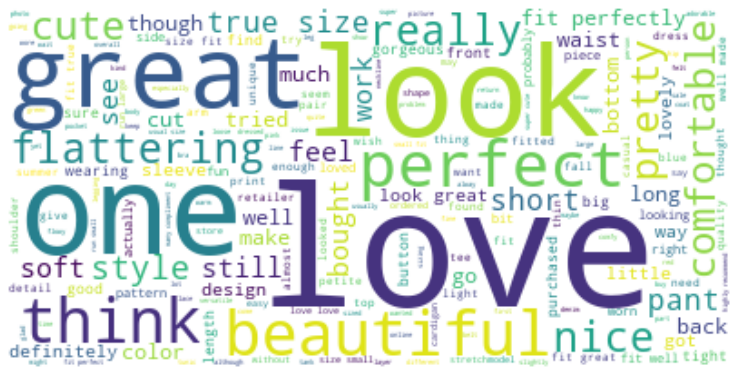

In [33]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

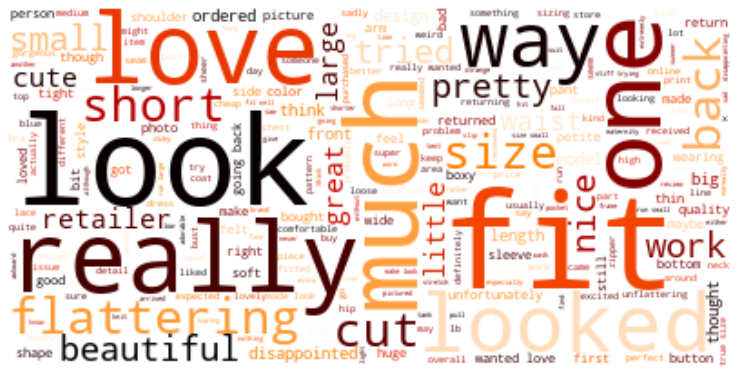

In [34]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# MODEL 

In [35]:
X = positive['Review_clear']
y = positive['Recommended']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [38]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2))

X_train_vectorized = vect.fit_transform(X_train)

len(vect.get_feature_names())

14141

# Random forest

In [39]:
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3708

    accuracy                           1.00      3708
   macro avg       1.00      1.00      1.00      3708
weighted avg       1.00      1.00      1.00      3708



# navine bayes

In [41]:
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)
pred_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3708

    accuracy                           1.00      3708
   macro avg       1.00      1.00      1.00      3708
weighted avg       1.00      1.00      1.00      3708

